https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

## Sigmoid

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid(1)

0.7310585786300049

In [3]:
from sklearn.datasets import load_digits
digits = load_digits() # 8x8 = 64 pixels  -- Very clean Dataset 

#### Now that you have the dataset loaded you can use the commands below

In [5]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [7]:
digits.data.shape

(1797, 64)

In [8]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [66]:
import pandas as pd

# Concatena primeras 64 columnas que corresponden a los arrays de digits.data con digits.target
df = pd.DataFrame(data= np.c_[digits['data'], digits['target']])
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [17]:
#df[(df[64] == 1) | (df[64] == 9)]

In [18]:
#df.iloc[0,:-1].values.shape

In [10]:
X_y = list(zip(digits.data, digits.target))
X_y_one_nine = []
for image, target in X_y:
    if target == 1 or target == 9:
        X_y_one_nine.append((image, target))
# Obtenemos una lista de sublistas, cada sublista tiene 2 componentes, una imagen (array) y un valor target, que hemos filtrado para ser target=1 o target=9    



In [17]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

[[ 0.  0. 10. 14.  8.  1.  0.  0.]
 [ 0.  2. 16. 14.  6.  1.  0.  0.]
 [ 0.  0. 15. 15.  8. 15.  0.  0.]
 [ 0.  0.  5. 16. 16. 10.  0.  0.]
 [ 0.  0. 12. 15. 15. 12.  0.  0.]
 [ 0.  4. 16.  6.  4. 16.  6.  0.]
 [ 0.  8. 16. 10.  8. 16.  8.  0.]
 [ 0.  1.  8. 12. 14. 12.  1.  0.]]


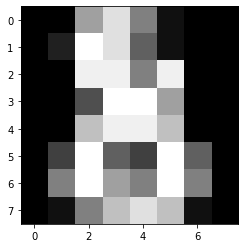

In [20]:
k = np.reshape(image, (8,8))
print(k)
plt.imshow(k, cmap=plt.cm.gray)

In [21]:
lista = [2, 6, "c", 9]
for i, x in enumerate(lista):
    print("####")
    print(i)
    print(x)

####
0
2
####
1
6
####
2
c
####
3
9


In [22]:
digits.target[0:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

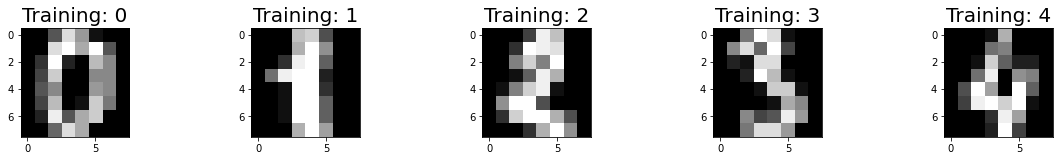

In [23]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: ' + str(label), fontsize = 20)

### Splitting Data into Training and Test Sets (Digits Dataset)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [26]:
print(y_train[:5])

[2 8 9 7 2]


### To predict

In [27]:
logisticRegr.predict(x_train[:5])

array([2, 8, 9, 7, 2])

In [28]:
x_train[:5].shape

(5, 64)

In [29]:
x_test.shape

(450, 64)

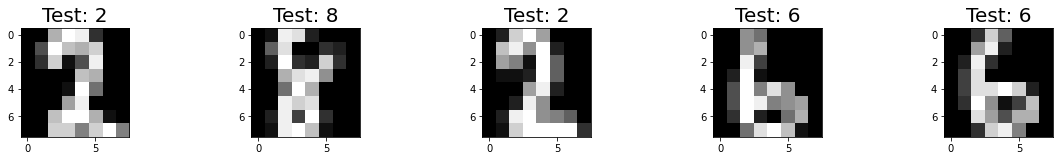

In [30]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(x_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Test: ' + str(label), fontsize = 20)

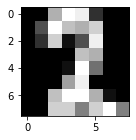

In [31]:
plt.rcParams['figure.figsize'] = 20 , 2
first_test_image = x_test[0]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.gray)

In [32]:
x_test[0].shape

(64,)

In [33]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1, -1))

array([2])

In [34]:
y_test[0:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [35]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

### Probabilities

In [36]:
x_test[:1].shape

(1, 64)

In [37]:
logisticRegr.predict_proba(x_test[:1])

array([[2.64009150e-14, 2.02030416e-12, 9.99999999e-01, 3.67506476e-11,
        1.02800611e-16, 3.74720212e-11, 1.43876638e-18, 5.80818925e-10,
        5.06957048e-12, 3.27306391e-15]])

In [38]:
sum(logisticRegr.predict_proba(x_test[0:1])[0])

1.0

In [39]:
logisticRegr.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
max(logisticRegr.predict_proba(x_test[0:1])[0])

0.9999999993378388

### Measuring Model Performance (Digits Dataset)

In [41]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score * 100, "%")

95.11111111111111 %


### Matriz de confusión

Eje horizontal: falso negativo

Eje vertical: falso positivo

In [42]:
import sklearn.metrics as metrics
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


Text(0.5, 1.0, 'Accuracy Score: 0.9511111111111111')

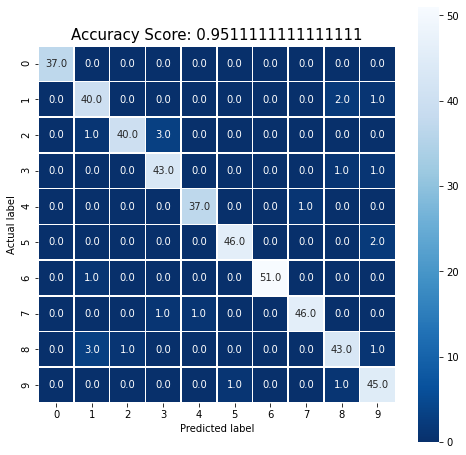

In [43]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)